# Project 4 - Extrasolar Planets

**Project deadline:** This project is due for submission on Monday, 04.07.2022, 23:55. Please check carefully the *About the Projects* section below for further details.

**Imprtant:** You again have the choice between two projects. This one focusses on an advanced scientific problem from astronomy (detection and analysis of extrasolar planets). It teaches modern analysis techniques, advanced statistical techniques  and it is based on real observations. The other project focusses on the implementation and analysis of a more complex system of differential equations. You will also learn how to create animations woth matplotlib.

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignments, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We hand-out four projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The project needs to be submitted by uploading this notebook to [Projects/Project 4](https://ecampus.uni-bonn.de/goto_ecampus_exc_2645968.html) on eCampus. You do not need to modify the notebooks name before your upload. Your project must be on eCampus by Monday, 04.07.2022, 23:55. **No late uploads can be accepted!**
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you need to be able to explain your solution in detail to your tutor and/or the lecturers! We might ask you for an interview about your project if the solution is (close to) identical to another students submission.**

**Note:** The tutors, Nina and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!

## Scientific Background

In this problem set, we are going to investigate a dataset that contains the *radial velocity* of a star at various points in time. The radial velocity is the velocity with which the star is moving towards or away from us (positive velocities indicate it is moving away from us).

If a star is not close to any other objects, there is no reason why the radial velocity should change over time. However, in the case where a second object is orbiting a star (such as a planet or another star), the star and the object will both orbit the center of mass of the two-body system. Therefore, the star will show periodic variations in its velocity over time. These changes in velocity then cause a shift in spectral lines via the Doppler effect, which we can measure with telescopes that have state-of-the art spectrographs. The smaller the second object, the less the star will be affected. For example, the Earth causes the Sun to change its velocity with an amplitude of 0.1 m/s over 1 year.

See the following video to see an example of a large planet orbiting a star and the effect on the observed spectral lines of the star:

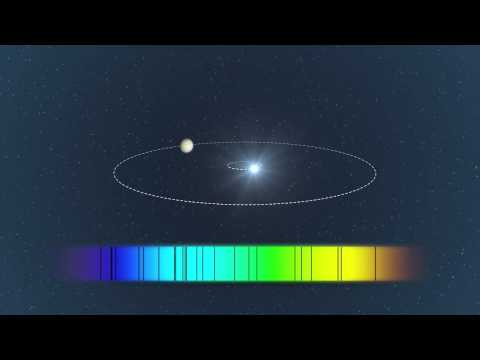

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("-BuwWtMygxU")

Measuring the radial velocity of stars to very high precision can therefore be used to find planets. Note that we cannot simply measure the velocity of planets around other stars, since they are much fainter than the stars themselves. Hence, they cannot be observed directly but we rely on *indirect* measures to detect them.

In this project, we want to find out whether a particular star has a companion object, and if so, we want to estimate the probability that the companion object is a planet.

## Analysis of a Extrasolar Planet candidate

The data file required for this project is [data/UID_0113357_RVC_001.tbl](data/UID_0113357_RVC_001.tbl). It was obtained from the [NASA Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/DisplayOverview/nph-DisplayOverview?objname=51+Peg+b&type=CONFIRMED_PLANET). Obtain the file, and then carry out the analysis described in Tasks 1 and Tasks 2.

**The first column is the time in days, the second column is the radial velocity in m/s, and the third column is the uncertainty in the radial velocity in m/s.** The fourth column can be ignored.

## Task 1 - Determination of the radial velocity of the host star

To start off, we want to see whether the star does indeed show periodic variations, and if so, we want to measure the period and amplitude. The amplitude is then a direct measure of the radial velocity.

**Read in the data and make a plot of the radial velocity in the file against time.** (make sure you include axis labels, units, and error bars!).

As you will see, the observations were not taken with equal spacing in time, and it does not look like we can easily see any periodic variations in the curve by eye, so we will instead use an automated method. The best way to find the period of a time series like this is to use a periodogram algorithm. One algorithm that works well in our case is the following:

1. pick a ``period``

2. compute the phase of the radial velocity curve:

        phase = (time % period) / period

3. sort the phase and velocity points by the phase.

4. find the length of a line that would join all the points, from left to right. If we write the sorted phase as $\phi$, the velocity as $v$, and the number of points as $N$, then this is:

  $$l = \sum_i^{N-1}{\sqrt{(\phi_{i+1} - \phi_{i})^2 + (v_{i+1} - v_{i})^2}}$$
  
  **Note:** Please consider the phase, the velocity and the length within the formula above as *unitless* quantities.  

5. repeat for different periods, and minimize the string length $l$.

**Implement this algorithm** and try and find the *string length* $l$ for 10,000 periods logarithmically spaced between 1 and 100 days. Note that the calculation of the string length should not use any loops, otherwise it will be very slow (but you can still loop over the periods).

**Hints:**

1. Please have a look at `np.logspace` to create a logarithmically spaced grid.

2. if you want to sort an array ``y`` according to the values of ``x``, you can use [np.argsort](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html):

    y_new = y[np.argsort(x)]

**Make a log-log plot of the string length versus the period** and describe the plot. You should see several clear minima. **Find the period** of the first clear minimum (optional question: why the first? what do the other minima correspond to?).

**Make a plot** of radial velocity (with error bars) versus phase for the period you found above, and if you have picked the period correctly you should see something that looks similar to one period of a sinusoidal function. This means that there are indeed periodic (and in fact sinusoidal) variations in the radial velocity curve, indicating that a second object is likely orbiting the star!

**Fit the radial velocity versus phase** using a function of the form:

$$f(x) = a \sin{(2\pi x + b)}$$

and **make a plot** of the radial velocity (with error bars) and with the best-fit overplotted.

The parameter $a$ will give the amplitude of the radial velocity curve (if it gives a negative value, be sure to make it positive for the next Task). **Find the uncertainty on $a$** using the covariance matrix returned by the fitting function.

You should now have the period, and the amplitude (with uncertainty) of the radial velocity curve!

## Task 2 - Mass analysis of the extrasolar planet *51 Peg b*

In this task, we will now try and estimate the mass of the invisible companion that is orbiting the star. At the end of Task 1, we found that the radial velocity curve could be well fit by a sinusoidal curve, which suggests that the invisible companion is on a circular orbit (at least to a good approximation).

For two bodies (in our case a star and an unknown object) orbiting a common center of mass in circular orbits, Kepler's 3rd law of motion states that:

$$\frac{4\pi^2}{T^2} = \frac{G M_\star (1 + q)}{R^3}$$

where $T$ is the orbital period, $M_\star$ is the mass of the star, $q$ is the ratio of the object mass to the mass of the star, and $R$ is the distance between the object and the star.

In addition, for two objects orbiting a common center of mass, the amplitudes of the velocities $K$ will be related to the mass of the two objects - with the more massing one moving less:

$$\frac{K_\star}{K_{\rm object}} = q$$

Finally, for a circular orbit:

$$K_{\rm object} T = 2\pi R$$

Substituting this back into Kepler's law and simplifying gives:

$$(1 + q)~q^3 = \frac{T K_{\rm star}^3}{2\pi G M_\star}$$

Finally, there is one final important thing to consider, which is that the velocity amplitude we measure for the star is not $K_{\rm star}$ but

$$K_{\rm obs,star} = K_{\rm star}~\sin{i}$$

where $i$ is the viewing angle of the system ($i=90^\circ$ means that we are observing the system *edge-on*, and $i=0^\circ$ corresponds to a *face-on* orientation where we would not see the star move towards or away from us). $K_{\rm obs,star}$ is the amplitude of the velocity - the ``a`` parameter - that you determined in Task 1.

Therefore, assuming $q << 1$, the final equation is:

$$q \approx \left(\frac{T}{2\pi G M_\star}\right)^{1/3} \frac{K_{\rm obs,star}}{\sin{i}}$$

**Compute the value of $q$** assuming the values of $T$ and $K_{\rm obs,star}$ you found in Part 1, and assuming $\sin{i}=1$ and assuming that $M_\star$ is the mass of the Sun ($M_\star=1.989\times 10^{30}$kg). Using $q$, derive the mass of the object in units of the mass of Jupiter ($M_{\rm Jupiter}=1.898\times 10^{27}$kg). Is the object likely to be a planet (see below)?

In reality, your measurement of $K_{\rm obs,star}$ has uncertainties, the mass of the star is uncertain, and the viewing angle is also uncertain. **Carry out a Monte-Carlo error propagation** simulation to find the likely distribution of masses for the object assuming that:

* the error on the radial velocity is the one derived in Part 1 and is a *normal* error (i.e. the distribution follows a Gaussian)

* the mass of the star is sampled from a *uniform distribution* between 0.6 and 1.4 times the mass of the Sun.

* the viewing angle can be anywhere between 0 and 90 degrees. However, one cannot simply sample $i$ randomly between 0 and 90 because some viewing angles are more likely than others - to do it properly you need to sample $\cos{i}$ uniformly between 0 and 1, then derive $i$ or $\sin{i}$ from this.

From the Monte-Carlo simulation, **plot a histogram** of the probability that the object has a certain mass, and show only the range from 0 to 13 times the mass of Jupiter.

**What is the (numerical) probability that the object is less massive than 13 times the mass of Jupiter?** (this is usually considered to be the upper limit for the mass of a planet). What degree of confidence do we have that the object is a planet, using the 1/2/3/4/5-sigma confidence terminology? (see [here](http://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule) for more information).

Based on this, what can you conclude about the object?

In [4]:
## Please put xour solutions below this point.